# Fundamental Analysis - Comprehensive Guide

This notebook demonstrates fundamental analysis of stocks using financial ratios, growth metrics, and valuation techniques.

## Learning Objectives:
- Understand and calculate key financial ratios (P/E, P/B, ROE, etc.)
- Analyze profitability, liquidity, and leverage
- Calculate and interpret growth metrics (revenue growth, CAGR)
- Analyze earnings trends and surprises
- Compare companies using fundamental metrics
- Perform simple valuation analysis
- Combine fundamental and technical analysis

## Table of Contents:
1. [Setup and Data](#setup)
2. [Valuation Ratios](#valuation)
3. [Profitability Analysis](#profitability)
4. [Liquidity and Leverage](#liquidity)
5. [Growth Metrics](#growth)
6. [Earnings Analysis](#earnings)
7. [Cash Flow Analysis](#cashflow)
8. [Company Comparison](#comparison)
9. [Complete Fundamental Analysis](#complete)

<a id='setup'></a>
## 1. Setup and Data Loading

In [1]:
import sys
sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Import our modules
from src.data.fetcher import get_stock_data
from src.fundamental import (
    FinancialRatios,
    GrowthMetrics,
    get_all_ratios,
    compare_stocks,
    get_growth_summary
)

# Configure display
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)
%matplotlib inline

print("Imports successful!")

Imports successful!


In [2]:
# Select a stock to analyze
ticker = 'AAPL'

# Get basic info
info = FinancialRatios.get_stock_info(ticker)

print(f"=== Company Information: {ticker} ===")
print(f"Name: {info.get('longName', 'N/A')}")
print(f"Sector: {info.get('sector', 'N/A')}")
print(f"Industry: {info.get('industry', 'N/A')}")
print(f"Market Cap: ${info.get('marketCap', 0):,.0f}")
print(f"Employees: {info.get('fullTimeEmployees', 'N/A'):,}" if info.get('fullTimeEmployees') else "Employees: N/A")
print(f"\nDescription: {info.get('longBusinessSummary', 'N/A')[:300]}..." if info.get('longBusinessSummary') else "")

=== Company Information: AAPL ===
Name: Apple Inc.
Sector: Technology
Industry: Consumer Electronics
Market Cap: $4,062,705,090,560
Employees: 166,000

Description: Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. The company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising Ai...


<a id='valuation'></a>
## 2. Valuation Ratios

Valuation ratios help determine if a stock is overvalued or undervalued.

In [3]:
# Calculate valuation ratios
print("=== Valuation Ratios ===")
print(f"\nP/E Ratio (Trailing): {FinancialRatios.pe_ratio(ticker):.2f}" if FinancialRatios.pe_ratio(ticker) else "P/E Ratio: N/A")
print(f"P/E Ratio (Forward): {FinancialRatios.pe_ratio(ticker, use_forward=True):.2f}" if FinancialRatios.pe_ratio(ticker, use_forward=True) else "Forward P/E: N/A")
print(f"P/B Ratio: {FinancialRatios.pb_ratio(ticker):.2f}" if FinancialRatios.pb_ratio(ticker) else "P/B Ratio: N/A")
print(f"P/S Ratio: {FinancialRatios.ps_ratio(ticker):.2f}" if FinancialRatios.ps_ratio(ticker) else "P/S Ratio: N/A")
print(f"PEG Ratio: {FinancialRatios.peg_ratio(ticker):.2f}" if FinancialRatios.peg_ratio(ticker) else "PEG Ratio: N/A")
print(f"EV/EBITDA: {FinancialRatios.ev_ebitda(ticker):.2f}" if FinancialRatios.ev_ebitda(ticker) else "EV/EBITDA: N/A")

print("\n=== Interpretation ===")
print("P/E Ratio: Lower is generally better (but consider industry norms)")
print("P/B Ratio: <1 may indicate undervaluation, >5 may indicate overvaluation")
print("P/S Ratio: Useful for companies with no earnings")
print("PEG Ratio: <1 suggests undervalued relative to growth")
print("EV/EBITDA: Useful for comparing companies with different capital structures")

=== Valuation Ratios ===

P/E Ratio (Trailing): 36.65
P/E Ratio (Forward): 29.90
P/B Ratio: 54.85
P/S Ratio: 9.76
PEG Ratio: N/A
EV/EBITDA: 28.34

=== Interpretation ===
P/E Ratio: Lower is generally better (but consider industry norms)
P/B Ratio: <1 may indicate undervaluation, >5 may indicate overvaluation
P/S Ratio: Useful for companies with no earnings
PEG Ratio: <1 suggests undervalued relative to growth
EV/EBITDA: Useful for comparing companies with different capital structures


In [4]:
# Valuation assessment
assessment = FinancialRatios.assess_valuation(ticker)
print("\n=== Valuation Assessment ===")
print(assessment)


=== Valuation Assessment ===
P/E suggests overvalued; P/B suggests overvalued


<a id='profitability'></a>
## 3. Profitability Analysis

Profitability ratios measure how efficiently a company generates profit.

In [5]:
# Profit margins
margins = FinancialRatios.profit_margins(ticker)

print("=== Profit Margins ===")
print(f"Gross Margin: {margins['gross_margin']:.2f}%" if margins['gross_margin'] else "Gross Margin: N/A")
print(f"Operating Margin: {margins['operating_margin']:.2f}%" if margins['operating_margin'] else "Operating Margin: N/A")
print(f"Net Profit Margin: {margins['net_margin']:.2f}%" if margins['net_margin'] else "Net Margin: N/A")

# Return metrics
print("\n=== Return Metrics ===")
print(f"ROE (Return on Equity): {FinancialRatios.roe(ticker):.2f}%" if FinancialRatios.roe(ticker) else "ROE: N/A")
print(f"ROA (Return on Assets): {FinancialRatios.roa(ticker):.2f}%" if FinancialRatios.roa(ticker) else "ROA: N/A")

print("\n=== Interpretation ===")
print("Gross Margin: Higher is better (shows pricing power)")
print("Operating Margin: Measures operational efficiency")
print("Net Margin: Bottom-line profitability")
print("ROE: >15% is generally considered good")
print("ROA: >5% is generally considered good")

=== Profit Margins ===
Gross Margin: 46.91%
Operating Margin: 31.65%
Net Profit Margin: 26.92%

=== Return Metrics ===
ROE (Return on Equity): 171.42%
ROA (Return on Assets): 22.96%

=== Interpretation ===
Gross Margin: Higher is better (shows pricing power)
Operating Margin: Measures operational efficiency
Net Margin: Bottom-line profitability
ROE: >15% is generally considered good
ROA: >5% is generally considered good


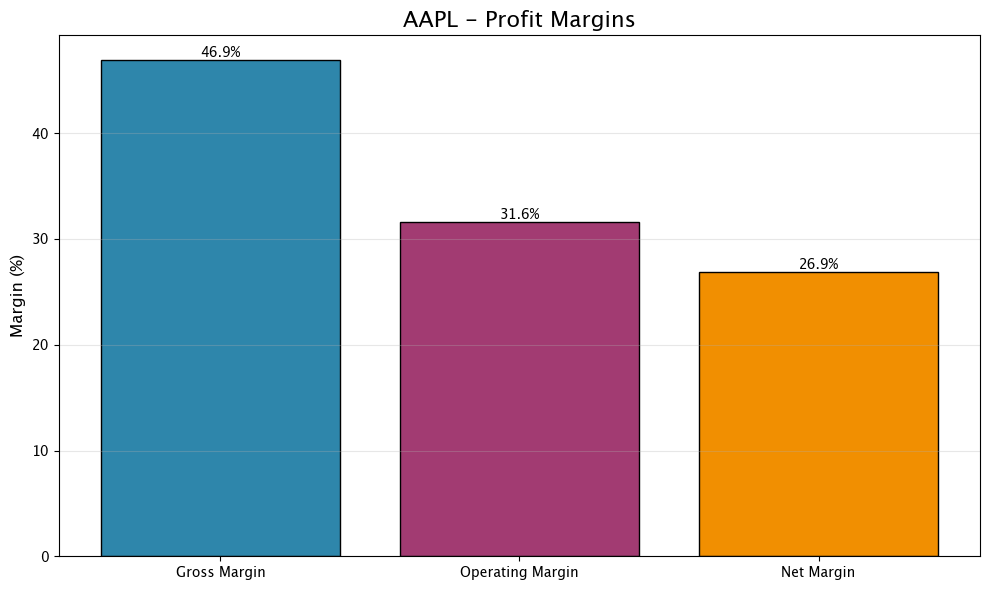

In [6]:
# Visualize profit margins
if all(margins.values()):
    plt.figure(figsize=(10, 6))
    margin_names = ['Gross Margin', 'Operating Margin', 'Net Margin']
    margin_values = [margins['gross_margin'], margins['operating_margin'], margins['net_margin']]
    
    colors = ['#2E86AB', '#A23B72', '#F18F01']
    bars = plt.bar(margin_names, margin_values, color=colors, edgecolor='black')
    
    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}%',
                ha='center', va='bottom', fontweight='bold')
    
    plt.title(f'{ticker} - Profit Margins', fontsize=16, fontweight='bold')
    plt.ylabel('Margin (%)', fontsize=12)
    plt.grid(True, alpha=0.3, axis='y')
    plt.tight_layout()
    plt.show()
else:
    print("Insufficient data for margin visualization")

<a id='liquidity'></a>
## 4. Liquidity and Leverage Analysis

Assess the company's ability to meet short-term obligations and its debt levels.

In [7]:
# Liquidity ratios
print("=== Liquidity Ratios ===")
print(f"Current Ratio: {FinancialRatios.current_ratio(ticker):.2f}" if FinancialRatios.current_ratio(ticker) else "Current Ratio: N/A")
print(f"Quick Ratio: {FinancialRatios.quick_ratio(ticker):.2f}" if FinancialRatios.quick_ratio(ticker) else "Quick Ratio: N/A")

print("\n=== Interpretation ===")
print("Current Ratio: >1.5 is generally considered healthy")
print("Quick Ratio: >1.0 indicates good short-term liquidity")

# Leverage ratios
print("\n=== Leverage Ratios ===")
print(f"Debt-to-Equity: {FinancialRatios.debt_to_equity(ticker):.2f}" if FinancialRatios.debt_to_equity(ticker) else "Debt-to-Equity: N/A")

print("\n=== Interpretation ===")
print("Debt-to-Equity: Lower is generally better")
print("<0.5 = Conservative, 0.5-1.5 = Moderate, >1.5 = Aggressive")

=== Liquidity Ratios ===
Current Ratio: 0.89
Quick Ratio: 0.77

=== Interpretation ===
Current Ratio: >1.5 is generally considered healthy
Quick Ratio: >1.0 indicates good short-term liquidity

=== Leverage Ratios ===
Debt-to-Equity: 152.41

=== Interpretation ===
Debt-to-Equity: Lower is generally better
<0.5 = Conservative, 0.5-1.5 = Moderate, >1.5 = Aggressive


<a id='growth'></a>
## 5. Growth Metrics

Analyze the company's growth trajectory.

In [8]:
# Get growth summary
growth_summary = GrowthMetrics.get_growth_summary(ticker)

print("=== Growth Metrics ===")
display(growth_summary)

# Growth assessment
print("\n=== Growth Assessment ===")
print(GrowthMetrics.assess_growth(ticker))

=== Growth Metrics ===


,Metric,Value
0,Revenue Growth (YoY),7.90
1,Earnings Growth (YoY),91.20
2,Revenue CAGR (5Y),NaN
3,Earnings CAGR (5Y),NaN
4,Revenue Per Share,27.84



=== Growth Assessment ===
Slow revenue growth (<10%); Strong earnings growth (>20%)


=== Annual Revenue Growth ===
2025-09-30    6.43
2024-09-30    2.02
2023-09-30   -2.80
2022-09-30    0.00
2021-09-30     NaN
Name: Total Revenue, dtype: float64


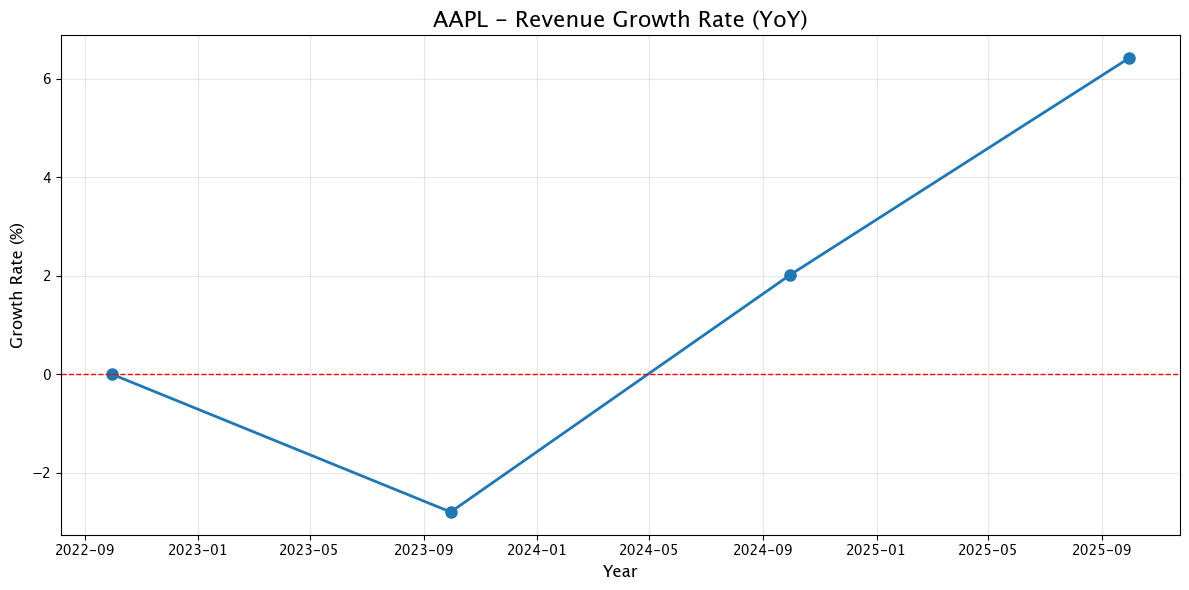

In [9]:
# Revenue growth trend
revenue_growth = GrowthMetrics.revenue_growth(ticker)

if revenue_growth is not None and not revenue_growth.empty:
    print("=== Annual Revenue Growth ===")
    print(revenue_growth.tail())
    
    # Plot revenue growth
    plt.figure(figsize=(12, 6))
    plt.plot(revenue_growth.index, revenue_growth.values, marker='o', linewidth=2, markersize=8)
    plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
    plt.title(f'{ticker} - Revenue Growth Rate (YoY)', fontsize=16, fontweight='bold')
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Growth Rate (%)', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print("Revenue growth data not available")

In [10]:
# Calculate CAGR
revenue_cagr = GrowthMetrics.calculate_cagr(ticker, years=5, metric='revenue')
earnings_cagr = GrowthMetrics.calculate_cagr(ticker, years=5, metric='earnings')

print("=== Compound Annual Growth Rate (CAGR) ===")
print(f"Revenue CAGR (5 years): {revenue_cagr:.2f}%" if revenue_cagr else "Revenue CAGR: N/A")
print(f"Earnings CAGR (5 years): {earnings_cagr:.2f}%" if earnings_cagr else "Earnings CAGR: N/A")

print("\nCAGR >15% is generally considered strong growth")

=== Compound Annual Growth Rate (CAGR) ===
Revenue CAGR (5 years): nan%
Earnings CAGR (5 years): nan%

CAGR >15% is generally considered strong growth


<a id='earnings'></a>
## 6. Earnings Analysis

Analyze earnings trends and EPS performance.

In [11]:
# EPS trend
eps_data = GrowthMetrics.eps_trend(ticker)

if eps_data is not None and not eps_data.empty:
    print("=== Annual EPS History ===")
    display(eps_data)
    
    # Plot EPS trend
    plt.figure(figsize=(12, 6))
    plt.plot(eps_data.index, eps_data['Earnings'], marker='o', linewidth=2, markersize=8, label='Earnings')
    plt.title(f'{ticker} - Annual Earnings (EPS) Trend', fontsize=16, fontweight='bold')
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Earnings per Share ($)', fontsize=12)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print("EPS data not available")

EPS data not available


/Users/kuen/stock/venv/lib/python3.14/site-packages/yfinance/scrapers/fundamentals.py:33: DeprecationWarning: 'Ticker.earnings' is deprecated as not available via API. Look for "Net Income" in Ticker.income_stmt.
  warnings.warn("'Ticker.earnings' is deprecated as not available via API. Look for \"Net Income\" in Ticker.income_stmt.", DeprecationWarning)


In [12]:
# Quarterly earnings
quarterly_earnings = GrowthMetrics.quarterly_earnings_trend(ticker)

if quarterly_earnings is not None and not quarterly_earnings.empty:
    print("=== Recent Quarterly Earnings ===")
    display(quarterly_earnings.tail(8))
    
    # Plot quarterly earnings
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))
    
    # Revenue
    if 'Revenue' in quarterly_earnings.columns:
        ax1.bar(range(len(quarterly_earnings.tail(12))), quarterly_earnings.tail(12)['Revenue'], 
               color='skyblue', edgecolor='black')
        ax1.set_title(f'{ticker} - Quarterly Revenue', fontsize=14, fontweight='bold')
        ax1.set_ylabel('Revenue', fontsize=12)
        ax1.grid(True, alpha=0.3, axis='y')
    
    # Earnings
    if 'Earnings' in quarterly_earnings.columns:
        ax2.bar(range(len(quarterly_earnings.tail(12))), quarterly_earnings.tail(12)['Earnings'],
               color='lightgreen', edgecolor='black')
        ax2.set_title(f'{ticker} - Quarterly Earnings', fontsize=14, fontweight='bold')
        ax2.set_ylabel('Earnings (EPS)', fontsize=12)
        ax2.set_xlabel('Quarter', fontsize=12)
        ax2.grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.show()
else:
    print("Quarterly earnings data not available")

Quarterly earnings data not available


<a id='cashflow'></a>
## 7. Cash Flow Analysis

Analyze the company's cash generation capabilities.

In [13]:
# Cash flow metrics
cf_metrics = GrowthMetrics.cash_flow_metrics(ticker)

print("=== Cash Flow Metrics ===")
display(cf_metrics)

print("\n=== Interpretation ===")
print("Operating Cash Flow: Cash generated from core operations")
print("Free Cash Flow: Cash available after capital expenditures")
print("EBITDA: Earnings before interest, taxes, depreciation, and amortization")
print("Positive FCF is essential for sustainable business")

=== Cash Flow Metrics ===


,Metric,Value
0,Operating Cash Flow,111482003456.00
1,Free Cash Flow,78862254080.00
2,Operating Margin (%),31.65
3,EBITDA,144748003328.00
4,EBITDA Margins (%),34.78



=== Interpretation ===
Operating Cash Flow: Cash generated from core operations
Free Cash Flow: Cash available after capital expenditures
EBITDA: Earnings before interest, taxes, depreciation, and amortization
Positive FCF is essential for sustainable business


<a id='comparison'></a>
## 8. Company Comparison

Compare the target company with competitors.

=== Financial Ratios Comparison ===


,P/E,P/B,P/S,PEG,ROE (%),Gross Margin (%),Net Margin (%),Debt/Equity,Current Ratio,Beta
AAPL,36.65,54.85,9.76,NaN,171.42,46.91,26.92,152.41,0.89,1.11
MSFT,34.60,9.97,12.32,NaN,32.24,68.76,35.71,33.15,1.40,1.07
GOOGL,30.95,9.79,9.85,NaN,35.45,59.17,32.23,11.42,1.75,1.07
AMZN,32.78,6.71,3.59,NaN,24.33,50.05,11.06,43.41,1.01,1.37


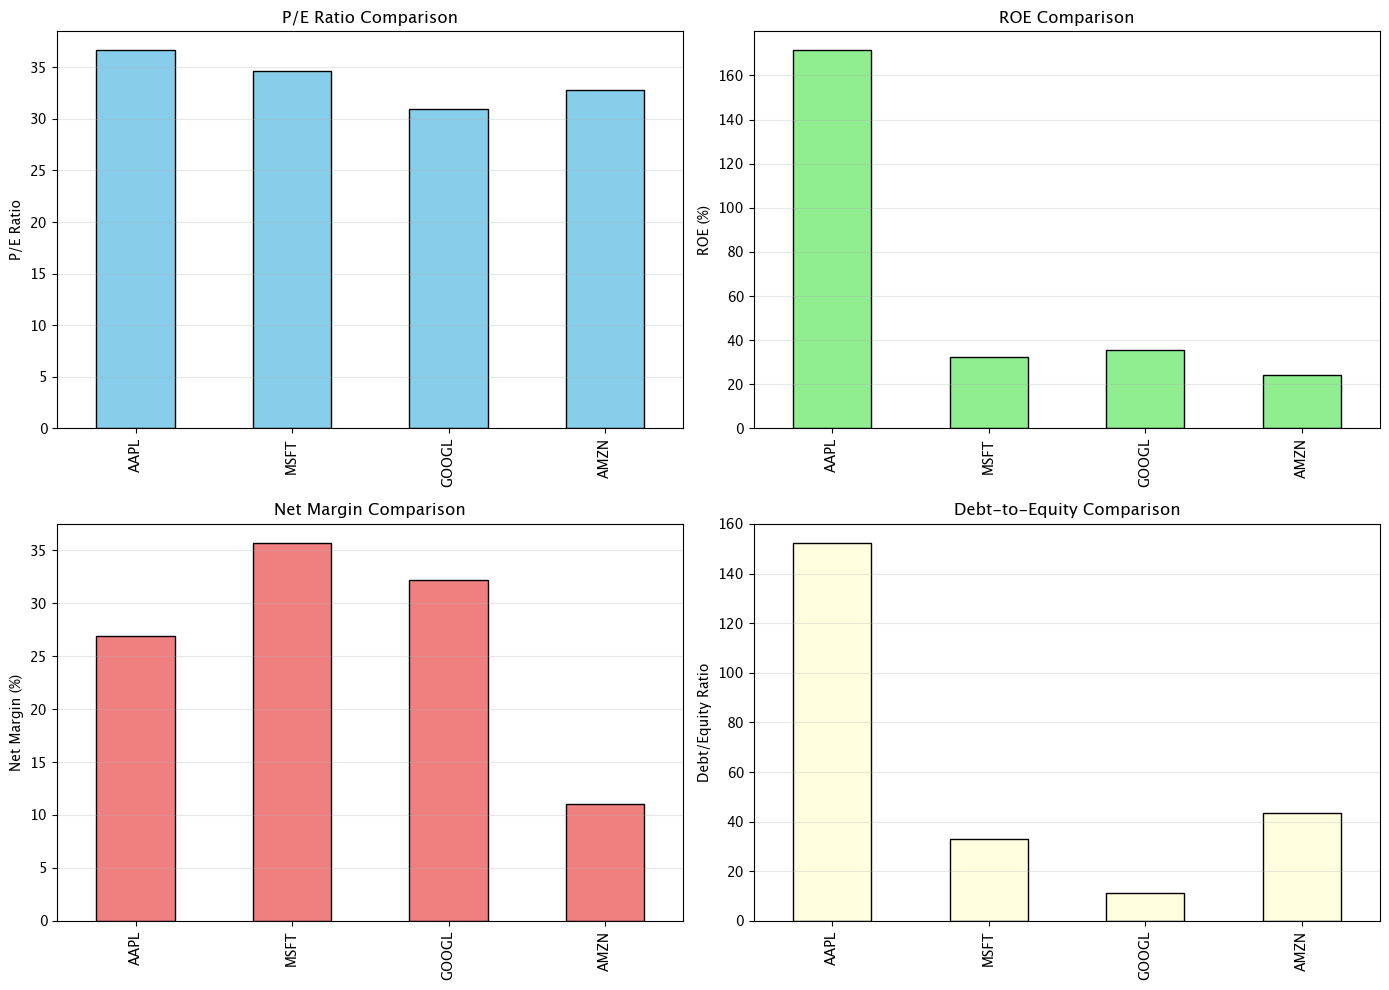

In [14]:
# Define comparison group (e.g., tech giants)
comparison_tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN']

# Compare financial ratios
ratio_comparison = FinancialRatios.compare_ratios(comparison_tickers)

print("=== Financial Ratios Comparison ===")
display(ratio_comparison)

# Visualize key metrics
if not ratio_comparison.empty:
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    
    # P/E Ratio
    if 'P/E' in ratio_comparison.columns:
        ratio_comparison['P/E'].plot(kind='bar', ax=axes[0,0], color='skyblue', edgecolor='black')
        axes[0,0].set_title('P/E Ratio Comparison', fontweight='bold')
        axes[0,0].set_ylabel('P/E Ratio')
        axes[0,0].grid(True, alpha=0.3, axis='y')
    
    # ROE
    if 'ROE (%)' in ratio_comparison.columns:
        ratio_comparison['ROE (%)'].plot(kind='bar', ax=axes[0,1], color='lightgreen', edgecolor='black')
        axes[0,1].set_title('ROE Comparison', fontweight='bold')
        axes[0,1].set_ylabel('ROE (%)')
        axes[0,1].grid(True, alpha=0.3, axis='y')
    
    # Net Margin
    if 'Net Margin (%)' in ratio_comparison.columns:
        ratio_comparison['Net Margin (%)'].plot(kind='bar', ax=axes[1,0], color='lightcoral', edgecolor='black')
        axes[1,0].set_title('Net Margin Comparison', fontweight='bold')
        axes[1,0].set_ylabel('Net Margin (%)')
        axes[1,0].grid(True, alpha=0.3, axis='y')
    
    # Debt/Equity
    if 'Debt/Equity' in ratio_comparison.columns:
        ratio_comparison['Debt/Equity'].plot(kind='bar', ax=axes[1,1], color='lightyellow', edgecolor='black')
        axes[1,1].set_title('Debt-to-Equity Comparison', fontweight='bold')
        axes[1,1].set_ylabel('Debt/Equity Ratio')
        axes[1,1].grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.show()

In [15]:
# Compare growth metrics
growth_comparison = GrowthMetrics.compare_growth_metrics(comparison_tickers)

print("\n=== Growth Metrics Comparison ===")
display(growth_comparison)


=== Growth Metrics Comparison ===


,Revenue Growth (%),Earnings Growth (%),Revenue CAGR 5Y (%),Market Cap,Enterprise Value
AAPL,7.90,91.20,NaN,4062705090560.00,4102854279168.00
MSFT,18.40,12.70,12.42,3620695441408.00,3638674063360.00
GOOGL,15.90,35.30,10.75,3797876998144.00,3729427529728.00
AMZN,13.40,36.40,NaN,2480878387200.00,2547119554560.00


<a id='complete'></a>
## 9. Complete Fundamental Analysis

Comprehensive analysis combining all metrics.

In [16]:
# Get all ratios
all_ratios = FinancialRatios.get_all_ratios(ticker)

print(f"=== COMPLETE FUNDAMENTAL ANALYSIS: {ticker} ===")
print(f"\nCompany: {info.get('longName', 'N/A')}")
print(f"Sector: {info.get('sector', 'N/A')}")
print(f"Industry: {info.get('industry', 'N/A')}")
print(f"Market Cap: ${info.get('marketCap', 0):,.0f}")

print("\n=== ALL FINANCIAL RATIOS ===")
display(all_ratios)

print("\n=== GROWTH SUMMARY ===")
display(growth_summary)

print("\n=== CASH FLOW ===")
display(cf_metrics)

=== COMPLETE FUNDAMENTAL ANALYSIS: AAPL ===

Company: Apple Inc.
Sector: Technology
Industry: Consumer Electronics
Market Cap: $4,062,705,090,560

=== ALL FINANCIAL RATIOS ===


,Metric,Value
0,P/E Ratio (Trailing),36.65
1,P/E Ratio (Forward),29.90
2,P/B Ratio,54.85
3,P/S Ratio,9.76
4,PEG Ratio,NaN
5,EV/EBITDA,28.34
6,Gross Margin (%),46.91
7,Operating Margin (%),31.65
8,Net Margin (%),26.92
9,ROE (%),171.42



=== GROWTH SUMMARY ===


,Metric,Value
0,Revenue Growth (YoY),7.90
1,Earnings Growth (YoY),91.20
2,Revenue CAGR (5Y),NaN
3,Earnings CAGR (5Y),NaN
4,Revenue Per Share,27.84



=== CASH FLOW ===


,Metric,Value
0,Operating Cash Flow,111482003456.00
1,Free Cash Flow,78862254080.00
2,Operating Margin (%),31.65
3,EBITDA,144748003328.00
4,EBITDA Margins (%),34.78


In [17]:
# Investment recommendation framework
def fundamental_score(ticker):
    """
    Simple scoring system (0-100) based on fundamental metrics.
    Higher score = more attractive fundamentals.
    """
    score = 0
    max_score = 100
    
    # Valuation (30 points)
    pe = FinancialRatios.pe_ratio(ticker)
    peg = FinancialRatios.peg_ratio(ticker)
    
    if pe and pe < 20: score += 10
    elif pe and pe < 30: score += 5
    
    if peg and peg < 1: score += 15
    elif peg and peg < 2: score += 10
    elif peg and peg < 3: score += 5
    
    # Profitability (30 points)
    roe = FinancialRatios.roe(ticker)
    margins = FinancialRatios.profit_margins(ticker)
    
    if roe and roe > 20: score += 15
    elif roe and roe > 15: score += 10
    elif roe and roe > 10: score += 5
    
    if margins['net_margin'] and margins['net_margin'] > 20: score += 15
    elif margins['net_margin'] and margins['net_margin'] > 10: score += 10
    elif margins['net_margin'] and margins['net_margin'] > 5: score += 5
    
    # Growth (20 points)
    stock_info = FinancialRatios.get_stock_info(ticker)
    rev_growth = stock_info.get('revenueGrowth')
    
    if rev_growth and rev_growth > 0.20: score += 20
    elif rev_growth and rev_growth > 0.10: score += 15
    elif rev_growth and rev_growth > 0: score += 10
    
    # Financial Health (20 points)
    current_ratio = FinancialRatios.current_ratio(ticker)
    debt_equity = FinancialRatios.debt_to_equity(ticker)
    
    if current_ratio and current_ratio > 2: score += 10
    elif current_ratio and current_ratio > 1.5: score += 7
    elif current_ratio and current_ratio > 1: score += 5
    
    if debt_equity is not None:
        if debt_equity < 50: score += 10
        elif debt_equity < 100: score += 7
        elif debt_equity < 150: score += 5
    
    return score

# Calculate score
score = fundamental_score(ticker)

print(f"\n=== FUNDAMENTAL SCORE: {score}/100 ===")
print("\nInterpretation:")
if score >= 80:
    print("STRONG BUY - Excellent fundamentals")
elif score >= 60:
    print("BUY - Good fundamentals")
elif score >= 40:
    print("HOLD - Average fundamentals")
else:
    print("CAUTION - Weak fundamentals")

print("\nNote: This is a simplified scoring system. Consider all factors before investing.")


=== FUNDAMENTAL SCORE: 40/100 ===

Interpretation:
HOLD - Average fundamentals

Note: This is a simplified scoring system. Consider all factors before investing.


## Summary

In this notebook, we covered:

### Valuation Analysis
- P/E, P/B, P/S, PEG ratios
- EV/EBITDA for enterprise value
- Valuation assessment framework

### Profitability Analysis
- Profit margins (gross, operating, net)
- Return metrics (ROE, ROA)
- Efficiency measurements

### Financial Health
- Liquidity ratios (current, quick)
- Leverage ratios (debt-to-equity)
- Balance sheet strength

### Growth Analysis
- Revenue and earnings growth
- CAGR calculations
- EPS trends

### Cash Flow
- Operating cash flow
- Free cash flow
- EBITDA metrics

### Peer Comparison
- Multi-company ratio comparison
- Relative valuation
- Competitive positioning

### Key Takeaways
1. No single ratio tells the complete story - use multiple metrics
2. Compare companies within the same industry
3. Look for consistency in growth and profitability
4. Balance sheet strength matters for long-term stability
5. Consider both value and growth factors
6. Combine fundamental analysis with technical analysis for best results

## Next Steps

In the next notebook (`04_ml_price_prediction.ipynb`), we'll learn:
- Feature engineering for ML models
- Random Forest price prediction
- LSTM neural networks
- Model evaluation and comparison
- Prediction visualization